# ML: Naïve Bayes

Diberikan sebuah Trainset berupa himpunan data berisi 160 objek data yang memiliki 7 atribut input (age, workclass, education, marital-status, occupation, relationship, hours-per-week) dan 1 output (label kelas income) yang memiliki 2 kelas/label (>50K, dan <=50K). Bangunlah sebuah sistem klasifikasi menggunakan metode Naïve Bayes untuk menentukan kelas/label data testing dalam Testset. Sistem membaca masukan file TrainsetTugas1ML.csv  dan TestsetTugas1ML.csv dan mengeluarkan output berupa file TebakanTugas1ML.csv berupa satu kolom berisi 40 baris yang menyatakan kelas/label baris yang bersesuaian pada file TestsetTugas1ML.csv.

## Data Preparation

In [1]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



data_train = pd.read_csv('TrainsetTugas1ML.csv')
data_train = data_train.drop(columns=['id'])
data_test = pd.read_csv('TestsetTugas1ML.csv')
id_test = data_test['id']
data_test = data_test.drop(columns=['id'])

### Data Train

In [2]:
data_train.describe()

,age,workclass,education,marital-status,occupation,relationship,hours-per-week,income
count,160,160,160,160,160,160,160,160
unique,3,3,3,3,3,3,3,2
top,young,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,normal,>50K
freq,86,137,72,127,62,126,149,120


### Data Test

In [3]:
data_test.head()

,age,workclass,education,marital-status,occupation,relationship,hours-per-week
0,young,Private,HS-grad,Never-married,Craft-repair,Not-in-family,normal
1,young,Private,Bachelors,Divorced,Exec-managerial,Not-in-family,normal
2,young,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,normal
3,adult,Private,Some-college,Divorced,Prof-specialty,Not-in-family,normal
4,young,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,many


## Create the Model

### Data Correlation

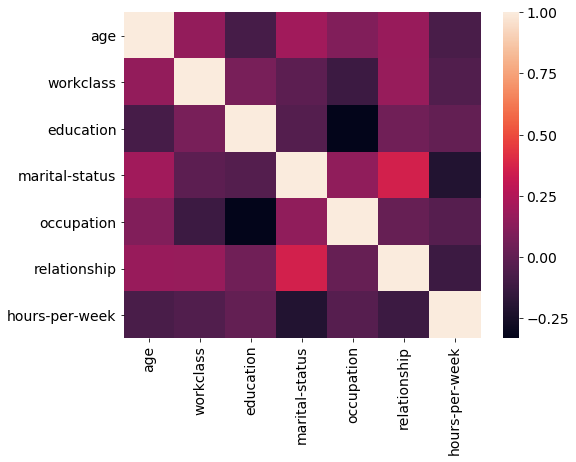

In [4]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data2 = data_train.drop(columns=['income'])

for feature in data2.columns:
  le = preprocessing.LabelEncoder()
  le = le.fit(data2[feature])
  data2[feature] = le.transform(data2[feature])
sns.heatmap(data2.corr())

### Model Function

In [5]:
def naive_model(data, target):
    features = data.columns[data.columns != target]
    classes = data[target].unique()

    probabilities = {}
    kelas_probs = {}

    for output_kelas in classes:
        data2 = data[data[target] == output_kelas][features]
        attribute_probs = {}
        occurrences = len(data2)
        for kolom in data2.columns:
            label_attr = {}
            for value,count in data2[kolom].value_counts().iteritems():
                prob = (count+1)/(occurrences+3)
                label_attr[value] = prob
            attribute_probs[kolom] = label_attr
        probabilities[output_kelas] = attribute_probs
        kelas_probs[output_kelas] = (len(data2)+1)/(len(data)+2)
        
    return kelas_probs, probabilities

## Naive Bayes Function

In [6]:
def naive_bayes(data, probabilities, output_prob, target):
    predicted = []
    features = data.columns[data.columns != target]
    output_labels = list(output_prob.keys())
    for idx in data.index:
        prod_0 = output_prob[output_labels[0]]
        prod_1 = output_prob[output_labels[1]]
        for feature in features:
            prod_0 *= probabilities[output_labels[0]][feature][data[feature].loc[idx]]
            prod_1 *= probabilities[output_labels[1]][feature][data[feature].loc[idx]]
        
        #Predict the class, >50K or <=50K
        if prod_0 > prod_1:
            predicted.append(output_labels[0])
        else:
            predicted.append(output_labels[1])
    
    return predicted

## Accuracy

In [7]:
target = 'income'
kelas_probs, probabilities = naive_model(data_train, target)
print(kelas_probs)
probabilities

{'>50K': 0.7469135802469136, '<=50K': 0.25308641975308643}


{'>50K': {'age': {'young': 0.5447154471544715,
   'adult': 0.43902439024390244,
   'old': 0.016260162601626018},
  'workclass': {'Private': 0.8617886178861789,
   'Local-gov': 0.07317073170731707,
   'Self-emp-not-inc': 0.06504065040650407},
  'education': {'Bachelors': 0.5365853658536586,
   'HS-grad': 0.23577235772357724,
   'Some-college': 0.22764227642276422},
  'marital-status': {'Married-civ-spouse': 0.8861788617886179,
   'Never-married': 0.06504065040650407,
   'Divorced': 0.04878048780487805},
  'occupation': {'Exec-managerial': 0.3902439024390244,
   'Prof-specialty': 0.34146341463414637,
   'Craft-repair': 0.2682926829268293},
  'relationship': {'Husband': 0.8780487804878049,
   'Not-in-family': 0.0975609756097561,
   'Own-child': 0.024390243902439025},
  'hours-per-week': {'normal': 0.9512195121951219,
   'low': 0.032520325203252036,
   'many': 0.016260162601626018}},
 '<=50K': {'age': {'young': 0.4883720930232558,
   'adult': 0.46511627906976744,
   'old': 0.04651162790697

In [8]:
data_predict = naive_bayes(data_train, probabilities, kelas_probs, target)
akurasi = accuracy_score(data_predict, data_train['income'])*100
print('Akurasi: '+str(akurasi)+'%')

Akurasi: 83.75%


## Data Test Prediction

In [10]:
test_predict = naive_bayes(data_test, probabilities, kelas_probs, target)

pred = pd.DataFrame()
pred['income'] = test_predict
pred.to_csv('TebakanTugas1ML.csv',index=False)